In [ ]:
# upload Dataset csv file
from google.colab import files
files.upload()

Saving SBIN.NS.csv to SBIN.NS.csv


{'SBIN.NS.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2010-12-14,274.920013,280.500000,274.054993,279.269989,133.869278,24181790\n2010-12-15,278.299988,278.299988,267.000000,269.804993,129.332169,30594750\n2010-12-16,270.899994,277.899994,267.739990,276.295013,132.443176,45922940\n2010-12-20,275.000000,275.000000,269.000000,270.045013,129.447250,24810450\n2010-12-21,270.924988,276.500000,270.924988,274.375000,131.522827,19613340\n2010-12-22,274.799988,278.799988,273.000000,274.494995,131.580353,18938400\n2010-12-23,275.500000,276.790009,273.510010,274.625000,131.642654,11988360\n2010-12-24,274.600006,276.899994,273.000000,275.535004,132.078873,11545630\n2010-12-27,276.450012,277.135010,274.559998,275.119995,131.879944,10204450\n2010-12-28,276.500000,276.500000,272.500000,272.850006,130.791824,9764330\n2010-12-29,273.500000,276.320007,273.125000,275.519989,132.071686,9241550\n2010-12-30,275.100006,278.045013,274.179993,274.964996,131.805649,21062540\n2010-12-31,275.399994,282.744

In [ ]:
import pandas as pd
state_bank=pd.read_csv('SBIN.NS.csv')
state_bank

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-14,274.920013,280.500000,274.054993,279.269989,133.869278,24181790.0
1,2010-12-15,278.299988,278.299988,267.000000,269.804993,129.332169,30594750.0
2,2010-12-16,270.899994,277.899994,267.739990,276.295013,132.443176,45922940.0
3,2010-12-20,275.000000,275.000000,269.000000,270.045013,129.447250,24810450.0
4,2010-12-21,270.924988,276.500000,270.924988,274.375000,131.522827,19613340.0
...,...,...,...,...,...,...,...
2464,2020-12-07,263.799988,271.450012,263.000000,269.600006,269.600006,76053084.0
2465,2020-12-08,270.950012,273.700012,265.250000,271.899994,271.899994,65617502.0
2466,2020-12-09,272.100006,274.899994,269.200012,270.350006,270.350006,48495641.0
2467,2020-12-10,269.000000,271.000000,265.549988,269.549988,269.549988,38676657.0


In [ ]:
state_bank.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [ ]:
state_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2469 non-null   object 
 1   Open       2461 non-null   float64
 2   High       2461 non-null   float64
 3   Low        2461 non-null   float64
 4   Close      2461 non-null   float64
 5   Adj Close  2461 non-null   float64
 6   Volume     2461 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


In [ ]:
state_bank_stock = state_bank.dropna(axis=0, inplace=False)

In [ ]:
# resetting index after droping column
state_bank_stock = state_bank_stock.reset_index()

In [ ]:
state_bank_stock['Date'][1976]

'2018-12-21'

In [ ]:
data_training = state_bank_stock.iloc[:1976,2:3].values
data_training

array([[274.920013],
       [278.299988],
       [270.899994],
       ...,
       [287.850006],
       [294.700012],
       [298.350006]])

In [ ]:
data_testing = state_bank_stock.iloc[1976:,2:3]
data_testing.shape

(485, 1)

In [ ]:
data_training.shape

(1976, 1)

In [ ]:
#feature scaling
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalerr = MinMaxScaler()
training_scalerr = scalerr.fit_transform(data_training)

In [ ]:
training_scalerr.shape[0]

1976

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,training_scalerr.shape[0]):
  x_train.append(training_scalerr[i-60:i,0])
  y_train.append(training_scalerr[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)  

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape[0], x_train.shape[1]

(1916, 60)

In [ ]:
#Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularisation
model.add(LSTM(60,return_sequences=True))
model.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularisation
model.add(LSTM(80,return_sequences=True))
model.add(Dropout(0.2))

# Adding the forth LSTM layer and some Dropout regularisation
model.add(LSTM(120))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 100, batch_size =64)

Epoch 1/100
30/30 [==============================] - 11s 18ms/step - loss: 0.0850
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0102
Epoch 3/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0083
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0063
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0066
Epoch 7/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0064
Epoch 8/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0051
Epoch 9/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 10/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0052
Epoch 11/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0046
Epoch 12/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 13/100
30/30 [====

Prepare test dataset

In [ ]:
#Making the predictions and visualising the results

In [ ]:
dataset_train = state_bank_stock.iloc[:1976,2:3]

data_testing = state_bank_stock.iloc[1976:,2:3]

In [ ]:
total_dataset = pd.concat((dataset_train,data_testing),axis=0)

In [ ]:
total_dataset.shape

(2461, 1)

In [ ]:
input_to_model = total_dataset[len(total_dataset)-len(data_testing)-60:].values
input_to_model.shape

(545, 1)

In [ ]:
#feature scaling
inp = input_to_model.reshape(-1,1)
kp_inputs = scalerr.transform(inp)
kp_inputs.shape

(545, 1)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_test = []
for i in range(60,545):
  x_test.append(kp_inputs[i-60:i,0])
 
x_test = np.array(x_test) 

#Reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape[0],x_test.shape[1]

(485, 60)

In [ ]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

array([[0.7503588 ],
       [0.7359735 ],
       [0.73346984],
       [0.7315161 ],
       [0.7468457 ],
       [0.7378571 ],
       [0.75026035],
       [0.7533457 ],
       [0.75997186],
       [0.74534833],
       [0.7321899 ],
       [0.76508415],
       [0.7497988 ],
       [0.7868954 ],
       [0.78749406],
       [0.78905666],
       [0.77275527],
       [0.77510405],
       [0.7799611 ],
       [0.78447795],
       [0.76552284],
       [0.75201166],
       [0.7390952 ],
       [0.72750545],
       [0.7110512 ],
       [0.7191789 ],
       [0.7051419 ],
       [0.6841308 ],
       [0.6802802 ],
       [0.7135998 ],
       [0.7451532 ],
       [0.69433916],
       [0.6902094 ],
       [0.69711244],
       [0.7128236 ],
       [0.70102906],
       [0.69970703],
       [0.67959   ],
       [0.62871623],
       [0.62004435],
       [0.6040054 ],
       [0.5872608 ],
       [0.5964295 ],
       [0.62070423],
       [0.615805  ],
       [0.6250459 ],
       [0.60963714],
       [0.609

In [ ]:
predicted_stock_price2 = scalerr.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price = data_testing.values
real_stock_price.shape

(485, 1)

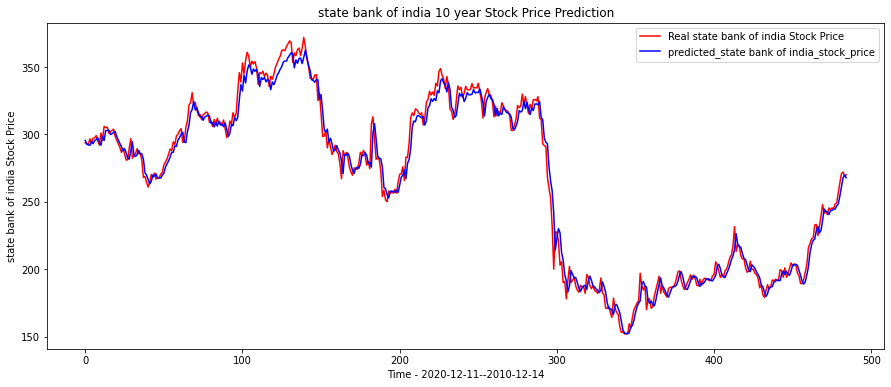

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(real_stock_price, color = 'red', label = 'Real state bank of india Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'predicted_state bank of india_stock_price')
plt.title('state bank of india 10 year Stock Price Prediction')
plt.xlabel('Time - 2020-12-11--2010-12-14')
plt.ylabel('state bank of india Stock Price')
plt.legend()
plt.show()

data download method from yahoo finance

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
sbi = yf.Ticker('SBIN.NS') 

In [ ]:
sbbi = sbi.history(period='10y') # start="2017-01-01", end="2017-04-30"

In [ ]:
sbbi

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-24,131.630678,132.733187,130.863708,132.078873,11545630,0.0,0.0
2010-12-27,132.517493,132.845850,131.611507,131.879944,10204450,0.0,0.0
2010-12-28,132.541465,132.541465,130.624047,130.791824,9764330,0.0,0.0
2010-12-29,131.103395,132.455178,130.923638,132.071686,9241550,0.0,0.0
2010-12-30,131.870366,133.282068,131.429354,131.805649,21062540,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-18,267.700012,271.950012,265.000000,271.450012,29816205,0.0,0.0
2020-12-21,268.450012,269.000000,251.050003,254.699997,55160758,0.0,0.0
2020-12-22,254.800003,258.700012,248.250000,257.450012,51189571,0.0,0.0
